In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow_quantum as tfq
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import pandas as pd

2023-11-04 11:04:41.927447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-04 11:04:41.927472: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-04 11:04:44.551986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-04 11:04:44.552009: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-04 11:04:44.552024: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paanduv-Modern-14-B5M): /proc/driver/nvidia/version does not exist
2023-11-04 11:04:44.552239: I tensorflow/core/platform/

In [2]:
df = pd.read_csv ('iris.data', names = ['f1', 'f2', 'f3', 'f4', 'class'], header = None)


In [3]:
df

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [5]:
!pip install pennylane >> /dev/null
!pip install strawberryfields >> /dev/null
!pip install PennyLane-SF >> /dev/null

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussio

In [6]:
Y = df['class']
X = df.drop(['class'], axis=1)
print("Shape of Input  features: {}".format(X.shape))
print("Shape of Output features: {}".format(Y.shape))

Shape of Input  features: (150, 4)
Shape of Output features: (150,)


In [7]:
Y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:


lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(Y)
     


In [9]:


def one_hot(labels):  
       
    depth =  4**2                       # 3 classes + 13 zeros for padding
    indices = labels.astype(np.int64)    
    one_hot_labels = np.eye(depth)[indices].astype(np.float64) 
    
    return one_hot_labels


Y_train = one_hot(Y_encoded)
     


In [10]:


x_train, x_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.05, random_state=42, stratify=Y_encoded, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))
     


Training Input shape	: (142, 4)
Testing Input shape	: (8, 4)
Training Output shape	: (142, 16)
Testing Output shape	: (8, 16)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:

keras.backend.set_floatx('float64')

model = keras.models.Sequential([
                                 layers.Dense(14, activation ="elu", input_shape=(4,)),
                                 layers.Dense(14, activation ="elu") 
                                ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                70        
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [13]:
import pennylane as qml

In [14]:
def data_encoding(x):
    qml.Squeezing(x[3], x[4], wires=0)
    qml.Squeezing(x[9], x[10], wires=1)
    
    qml.Beamsplitter(x[5], x[6], wires=[0,1])
    
    qml.Rotation(x[7], wires=0)
    qml.Rotation(x[8], wires=1)
    
    qml.Displacement(x[1], x[2], wires=0)
    qml.Displacement(x[11], x[12], wires=1)
    
    qml.Kerr(x[0], wires=0)
    qml.Kerr(x[13], wires=1)

In [15]:

def qnn_layer(v):
    qml.Beamsplitter(v[0], v[1], wires=[0,1])
    qml.Rotation(v[2], wires=0)
    qml.Rotation(v[3], wires=1)
    
    qml.Squeezing(v[4], 0.0, wires=0)
    qml.Squeezing(v[5], 0.0, wires=1)
    
    qml.Beamsplitter(v[6], v[7], wires=[0,1])
    qml.Rotation(v[8], wires=0)
    qml.Rotation(v[9], wires=1)
    
    qml.Displacement(v[10], 0.0, wires=0)
    qml.Displacement(v[11], 0.0, wires=1)
    
    qml.Kerr(v[12], wires=0)
    qml.Kerr(v[13], wires=1)

In [16]:


def init_weights(layers, modes, active_sd=0.0001, passive_sd=0.1):
    
    M = 2 + 1 + 1  

    int1_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    s_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    int2_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    dr_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    k_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)

    weights = tf.concat([int1_weights, s_weights, int2_weights, dr_weights, k_weights], axis=1)
    weights = tf.Variable(weights)

    return weights
     


In [17]:
num_modes = 2
cutoff_dim = 4

# select a devide 
dev = qml.device("strawberryfields.fock", wires=num_modes, cutoff_dim=cutoff_dim) 

@qml.qnode(dev, interface="tf")
def quantum_nn(inputs, var):
    data_encoding(inputs)

    for v in var:
        qnn_layer(v)

    return qml.probs(wires=[0, 1])

In [18]:

num_layers = 4

weigths = init_weights(num_layers, num_modes)

shape_tup = weigths.shape
weight_shapes = {'var': shape_tup}
qlayer = qml.qnn.KerasLayer(quantum_nn, weight_shapes, output_dim=4)

model.add(qlayer)

In [19]:
opt = keras.optimizers.SGD(lr = 0.002)
model.compile(opt, loss = 'categorical_crossentropy', metrics =['accuracy'])

/home/paanduv/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [ ]:


hybrid = model.fit(x_train, 
                   y_train,
                   epochs = 50,
                   batch_size = 64,
                   shuffle = True, 
                   validation_data = (x_test, y_test))
     


Epoch 1/50
3/3 [==============================] - 54s 14s/step - loss: 2.0472 - accuracy: 0.3732 - val_loss: 1.7146 - val_accuracy: 0.6250
Epoch 2/50
3/3 [==============================] - 52s 14s/step - loss: 1.8982 - accuracy: 0.4155 - val_loss: 1.7808 - val_accuracy: 0.3750
Epoch 3/50
3/3 [==============================] - 51s 14s/step - loss: 1.8871 - accuracy: 0.3873 - val_loss: 1.8878 - val_accuracy: 0.3750
Epoch 4/50
3/3 [==============================] - 51s 14s/step - loss: 1.8149 - accuracy: 0.4014 - val_loss: 1.4698 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 50s 14s/step - loss: 1.5061 - accuracy: 0.7324 - val_loss: 1.4060 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 50s 14s/step - loss: 1.4393 - accuracy: 0.7958 - val_loss: 1.3572 - val_accuracy: 0.8750
Epoch 7/50
3/3 [==============================] - 50s 14s/step - loss: 1.3896 - accuracy: 0.8169 - val_loss: 1.3147 - val_accuracy: 0.8750
Epoch 8/50
3/3 [===========

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                70        
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 keras_layer (KerasLayer)    (None, 4)                 56        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


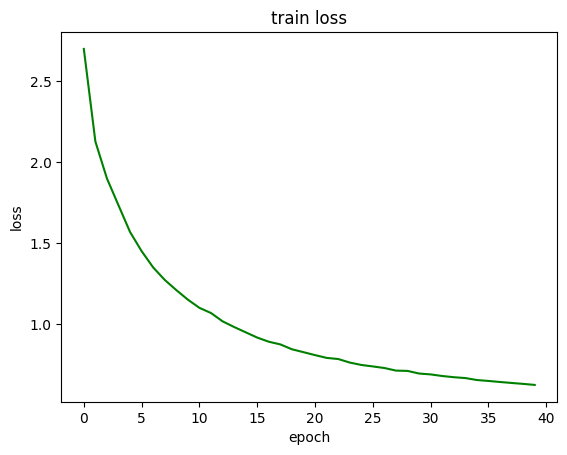

In [24]:
plt.title('train loss')
plt.plot(hybrid.history['loss'], '-g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

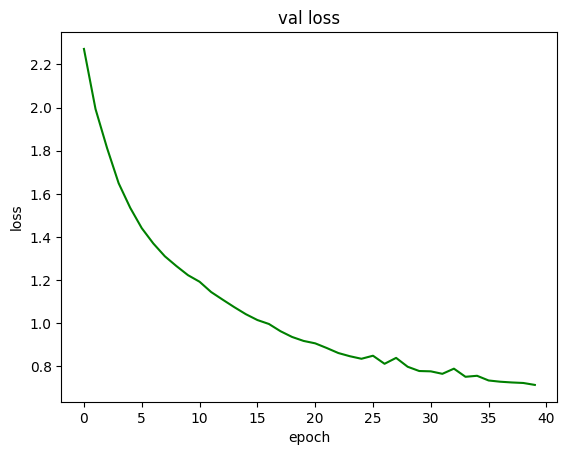

In [25]:

plt.title('val loss')
plt.plot(hybrid.history['val_loss'], '-g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

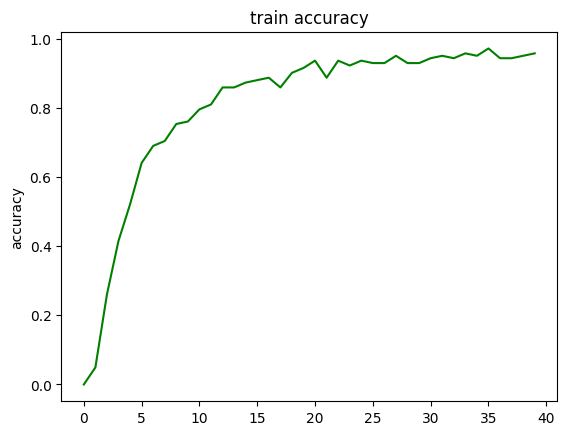

In [26]:
plt.title('train accuracy')
plt.plot(hybrid.history['accuracy'], '-g')
plt.ylabel('accuracy')
plt.show()

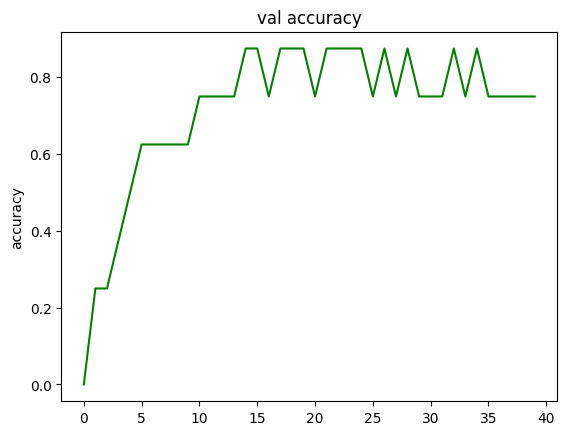

In [27]:
plt.title('val accuracy')
plt.plot(hybrid.history['val_accuracy'], '-g')
plt.ylabel('accuracy')
plt.show()